# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

In [ ]:
df_data.columns

In [ ]:
df_data.isna().values.sum()

In [ ]:
df_data.duplicated().values.sum()

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data.drop(columns=["Unnamed: 0.1","Unnamed: 0"],axis=1, inplace=True)
df_data

# Perguntas a se responder:

1- Orgs no top 10?<br>
2- 10 orgs que mais investiram em lançamentos? <br>
3- Quantidade de sucesso/fracasso?<br>
4- Existe um ano com um pico de fracasso?<br>
5- Localização com mais lançamentos? <br>
6- Quando foi o pico de lançamentos?<br>
8- E quando foi o ano de maior baixa?<br>
9- Quem lançou mais durante a Guerra Fria?<br>
10 Há um pico de lançamentos pela SpaceX? 

## Estatísticas descritivas e Transformação de dados


In [ ]:
df_data.describe()

In [ ]:
print(type(df_data.Price[0]))
print(type(df_data.Date[0]))

In [ ]:
df_data["Date"] = pd.to_datetime(df_data["Date"])

In [ ]:
df_data.Price = df_data.Price.str.replace(",","")
df_data.Price = pd.to_numeric(df_data.Price)

# Organizações no top 10 e a quantidade de lançamentos



In [ ]:
orgs = df_data.groupby("Organisation", as_index=False).agg({"Mission_Status": pd.Series.count})
orgs.sort_values("Mission_Status", inplace=True,ascending=False)

top_10_orgs = orgs[:10]
top_10_orgs

In [ ]:
plt.figure(figsize=(14,8))
bar = px.bar(top_10_orgs, x="Organisation", y="Mission_Status",color="Organisation")
bar.update_layout(title="Top 10 organições com mais lançamentos", yaxis_title="Quantidade de lançamentos",xaxis_title="Organizações")

bar.show()

# As 10 orgs que mais investiram em lançamentos espaciais

In [ ]:
orgs_prices = df_data.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum})
orgs_prices.sort_values("Price", inplace=True,ascending=False)

top_10_orgs_prices = orgs_prices[:10]
top_10_orgs_prices

In [ ]:
plt.figure(figsize=(14,8))
bar = px.bar(top_10_orgs_prices, x="Organisation",y="Price",color="Organisation")
bar.update_layout(title="As 10 organições que mais investiram em lançamentos(milhões de dolares)", yaxis_title="Valor total investido em lançamentos",xaxis_title="Organizações")
bar.show()

# Distribuição de missões
Quantas foram um sucesso?</br>
Quantas foram um fracasso?

In [ ]:
mission_status = df_data.groupby("Mission_Status",as_index=False).agg({"Rocket_Status":pd.Series.count})
mission_status.sort_values("Rocket_Status",ascending=False,inplace=True)
mission_status

In [ ]:
plt.figure(figsize=(14,8))
bar = px.bar(mission_status, x="Mission_Status",y="Rocket_Status", color="Mission_Status")
bar.update_layout(title="Status das missões", yaxis_title="Quantidade",xaxis_title="Status")
bar.show()

In [ ]:
df_data.head()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
df_data.Price.isna().values.sum()

In [ ]:
media = df_data.Price.mean()
media

In [ ]:
df_data.loc[df_data.Price.isna(), "Price"] = media

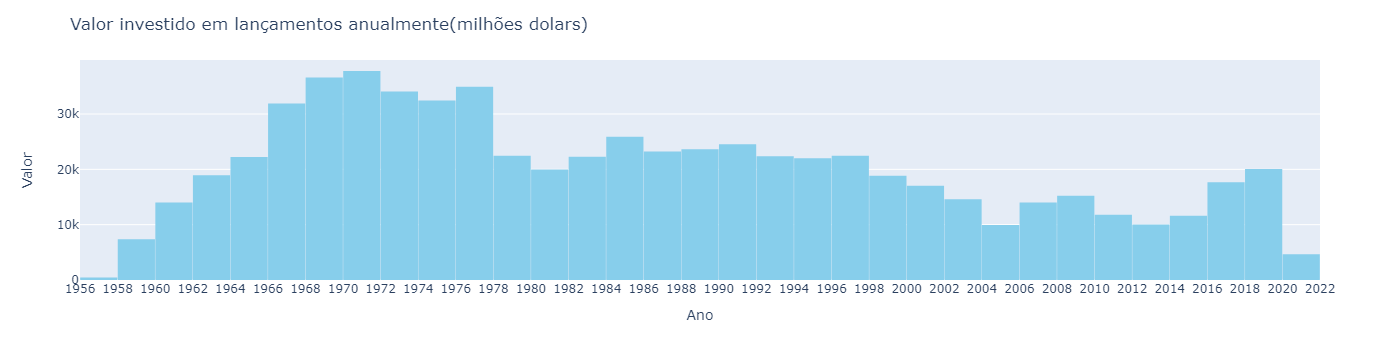

<Figure size 1400x800 with 0 Axes>

In [138]:
plt.figure(figsize=(14,8))
hist = px.histogram(data_frame=df_data, x="Date",y="Price",color_discrete_sequence=['skyblue'])

hist.update_layout(title = "Valor investido em lançamentos anualmente(milhões dolars)", xaxis_title = "Ano", yaxis_title="Valor",bargap=0.01)
hist.update_xaxes(minor_tickmode="auto", nticks=40)
hist.show()

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
for i in range(len(df_data)):
    if type(df_data["Date"][i]) == "datetime.datetime":
        continue
    else:
        print(i)

In [60]:
type(df_data["Date"][0].year)

int

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 